# <b>Titanic EDA</b>

<h3>The question we need to resolve is: What factors are related to passenger survival?<h3>

## <b>1) Import the libraries we need</b>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## <b>2) Load the data and read it</b>

### First of all, we need to load our dataset

In [57]:
ds = pd.read_csv("titanic.csv") # Loads the data into the variable. ds = dataset

### Now we can proceed and see what we have

In [58]:
ds # ds.head() for first 5 rows and ds.tail() for 5 last rows works too. If we leave it like this,it will show the first and last 5 rows.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Before proceeding, we need to know what type of info we are dealing with, and if there are any errors with it.

In [59]:
ds.info() # Gives us a summary of all the columns with the Non-Null Count and the data type of each one

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
ds.nunique() # Returns the number of unique values for each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [61]:
ds.isnull().sum() # Returns how many nulls are in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
(ds.isnull().sum()/(len(ds)))*100 # Now it returns the percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### As we can see, out of 891 passengers, 177 of them (19.8%) have null age and 687 (77.1%) with no cabin specified.

In [63]:
ds.describe() # Return multiple useful things for us to analyze, like the mean of each column and the min/max values.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### From this summary we can deduct some things:

#### <b>- Only 38% survived. Here is a more intuitive graphic:</b>

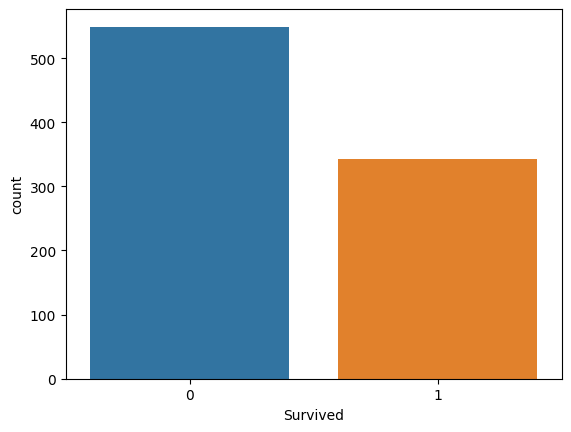

In [64]:
sb.countplot(x=ds["Survived"])
plt.show()

#### <b>- Most of the passengers were low standing, 3rd class. Its curious that there were more 1st class than 2nd class.</b>

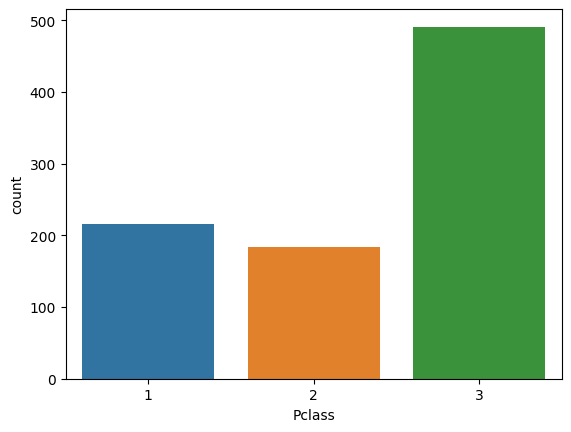

In [65]:
sb.countplot(x=ds["Pclass"])
plt.show()

#### <b> - Years range from 0.4 to 80 which shows that the passengers contain both young and old people.</b>

C:\Users\xDreamZzz\AppData\Local\Temp\ipykernel_13776\4027312116.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(ds["Age"]) # sb.histplot(ds["Age"]) or sb.displot(ds["Age"]) should work too


<Axes: xlabel='Age', ylabel='Density'>

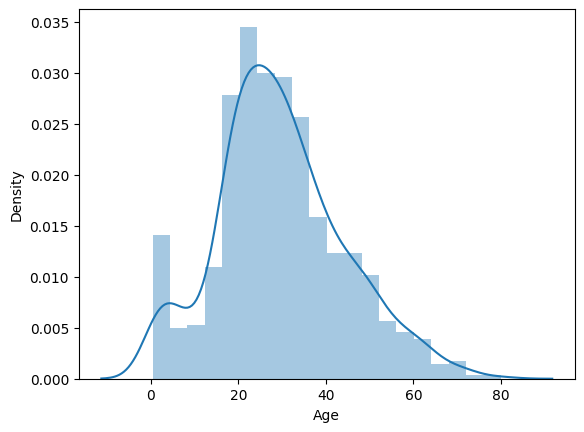

In [66]:
sb.distplot(ds["Age"]) # sb.histplot(ds["Age"]) or sb.displot(ds["Age"]) should work too

<Axes: xlabel='Age'>

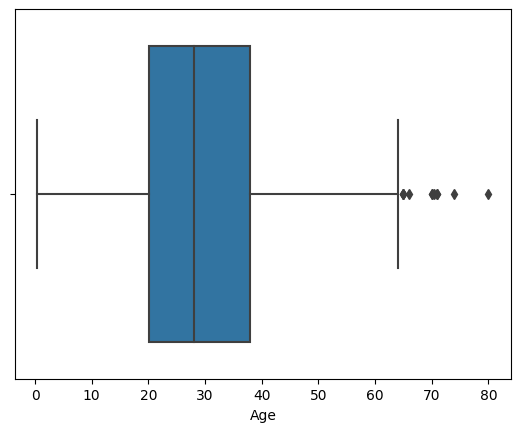

In [67]:
sb.boxplot(x=ds["Age"])

#### <b> Here we can see that the most commom ages are between 20 and 35. </b>

### <b>While there are some values that are in the outlier, it can be considered as a normal distribution</b>

## <b>Data Reduction</b>

### Looking back at our dataset, Cabin, Parch and Ticket doesn't give us any useful information so we are removing it.

In [68]:
ds = ds.drop(["Cabin", "Parch", "Ticket"], axis = 1) # Drops the columns from the data set and deletes them

### PassengerId only has ID values so we can assume that it doesnt have any predective power. We are going to make it into a index

In [69]:
ds.set_index("PassengerId", inplace=True) # Sets the desired column as index

In [70]:
ds

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,23.4500,S


### Now this is what we have with PassengerId as index and dropping Cabin column

## <b> Data Fix </b>

### If we scroll up a bit, we're gonna see that there are still some NoN-Null in the columns Age and Embarked. Time to fix that

In [71]:
ds["Age"].fillna(ds["Age"].mean(),inplace = True) # Fills the null values with the mean Age

In [72]:
ds["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Since we cant do the mean of the column Embarked cause it is object type, we count all the values and see that "S" has most of them. Now we can fill the empty values with this information.

In [73]:
ds["Embarked"].fillna('S',inplace =True)

In [74]:
ds.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

### With this, all the values are fixed.

# <b>3) Data Analysis</b>

### Time to analyze all the data we have and find what factors influenced the survival of the passengers.

#### <b>First we are going to see how many male passengers survived compared to female passengers</b>

In [75]:
# Returns a table with the survival/death percentage of each sex
pd.crosstab(ds["Sex"],ds["Survived"]).apply(lambda r : round((r/r.sum())*100,1),axis=1) 

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


In [76]:
ds.groupby(["Sex", "Survived"])["Survived"].count() # Separates male from female and counts how many f/m died (0) and how many survived (1)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

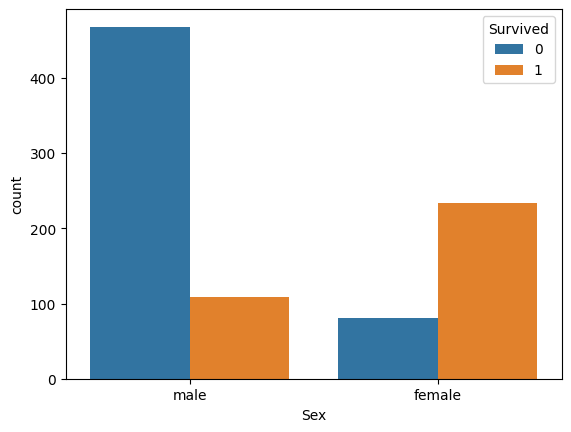

In [77]:
# Returns a graphic that shows the count of how many male/female survived (Orange,1) or died (Blue,0)
sb.countplot(data=ds,x="Sex",hue="Survived")
plt.show()

### <b> We can clearly see that the survival ratio of a female is much greater than male passengers.</b>

### We're gonna keep digging into the data and check if passenger class affects the survival rate too:

In [78]:
pd.crosstab(ds["Pclass"],ds["Survived"]).apply(lambda r : round((r/r.sum())*100,1),axis=1) 

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [79]:
ds.groupby(["Pclass", "Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

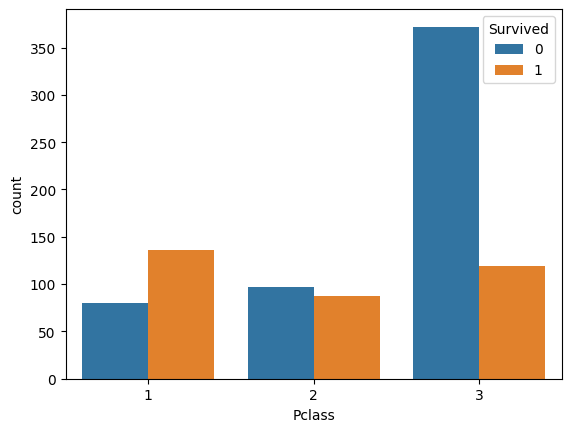

In [80]:
sb.countplot(data=ds,x="Pclass",hue="Survived")
plt.show()

### <b> In this graphics we can see that the higher the class, the higher the chance of surviving. While there is not much of a difference in the people that survived, if we check the count of the people that didn't, we see a huge gap between 1st class and 3rd class, those being 63% and 24% survavility respectively </b>

### Now we gonna compare both graphics and we will know how Pclass and the sex is relevant to survival probability.

<Axes: xlabel='Pclass', ylabel='Sex'>

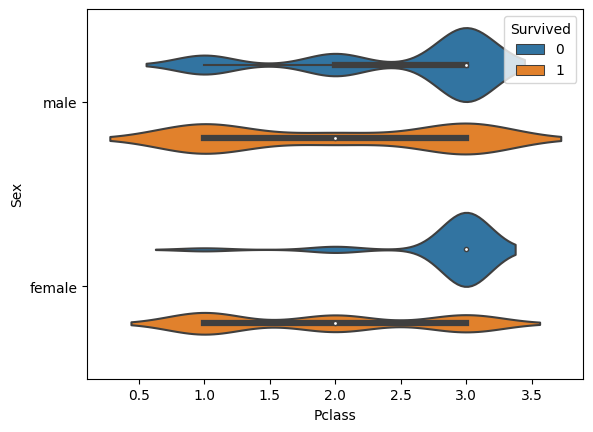

In [81]:
sb.violinplot(data=ds, x="Pclass", y="Sex", hue="Survived")

In [82]:
pd.crosstab(ds["Pclass"],[ds["Survived"],ds["Sex"]]).apply(lambda r : round((r/r.sum())*100,1),axis=1)

Survived      0            1      
Sex      female  male female  male
Pclass                            
1           1.4  35.6   42.1  20.8
2           3.3  49.5   38.0   9.2
3          14.7  61.1   14.7   9.6

### <b> As we can see here, being a female is a huge factor in surviving. We can also see that being in the 1st and 2nd class means that you have a higher chance to survive. </b>

#### Its time to see if the age also matters when it comes to survival rate between Female and Male passengers

In [83]:
range = [] # Initialize a empty list
for a in ds["Age"]:
    if a <= 10:
        range.append("0-10")
    elif a <= 20 and a > 10:
        range.append("11-20")
    elif a <= 30 and a > 20:
        range.append("21-30")   # Checks every value in the column "Age" and makes a new column with each passenger having a new age value
    elif a <= 40 and a > 30:
        range.append("31-40")
    elif a <= 50 and a > 40:
        range.append("41-50")
    else:
        range.append("51+")
ds = ds.assign(Range=range)

In [84]:
pd.crosstab(ds["Range"],[ds["Survived"],ds["Sex"]]).apply(lambda r : round((r/r.sum())*100,1),axis=1)

Survived      0            1      
Sex      female  male female  male
Range                             
0-10       18.8  21.9   29.7  29.7
11-20      10.4  51.3   29.6   8.7
21-30       9.1  57.5   23.8   9.6
31-40       5.8  49.7   29.7  14.8
41-50      11.6  50.0   24.4  14.0
51+         1.6  64.1   25.0   9.4

In [85]:
ds["Sex"] = (ds["Sex"] == "female").astype(int) # Turns the column "Sex" into int, male becoming 0 and female 1

<Axes: xlabel='Range', ylabel='Sex'>

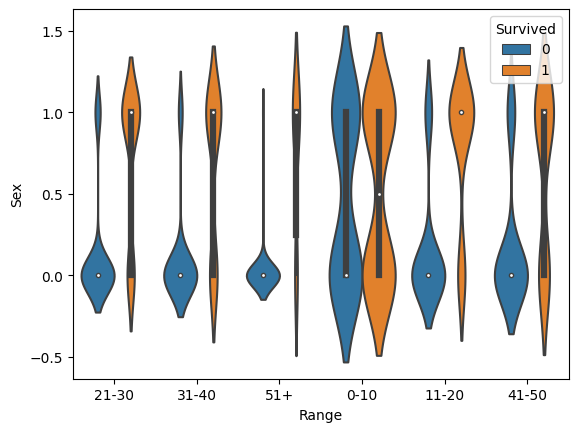

In [86]:
sb.violinplot(data=ds, x="Range", y="Sex", hue="Survived")

### <b> As last, here we can check that between 0-10 years old there is almost no difference in survival rate, but when it comes to 11+ there is a huge gap between male and female passengers. NOTE: We can lower the age range to check where this gap begins. </b>

# <b> 4) Logistic Regression </b>

### First we import the library we need

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### <b> Now we can work on it. Here we are going to make the column "Embarked" have int values instead of str. </b>

In [88]:
logReg = preprocessing.LabelEncoder()

column = ["Embarked"]
for col in column:
    ds[col] = logReg.fit_transform(ds[col])

In [89]:
ds

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked,Range
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,7.2500,2,21-30
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,71.2833,0,31-40
3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,7.9250,2,21-30
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,53.1000,2,31-40
5,0,3,"Allen, Mr. William Henry",0,35.000000,0,8.0500,2,31-40
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,13.0000,2,21-30
888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,30.0000,2,11-20
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,23.4500,2,21-30


### Done that, its time to drop some columns that we wont need on our prediction.

In [90]:
ds = ds.drop(["Name","Range"], axis = 1)

In [91]:
ds

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,,
1,0,3,0,22.000000,1,7.2500,2
2,1,1,1,38.000000,1,71.2833,0
3,1,3,1,26.000000,0,7.9250,2
4,1,1,1,35.000000,1,53.1000,2
5,0,3,0,35.000000,0,8.0500,2
...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,13.0000,2
888,1,1,1,19.000000,0,30.0000,2
889,0,3,1,29.699118,1,23.4500,2


### We're finished preparing our data, so now we need to split what we need to predict (in this case "Survived") from the rest of the columns.

In [92]:
X = ds.drop(["Survived"], axis = 1)

In [93]:
X

,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,
1,3,0,22.000000,1,7.2500,2
2,1,1,38.000000,1,71.2833,0
3,3,1,26.000000,0,7.9250,2
4,1,1,35.000000,1,53.1000,2
5,3,0,35.000000,0,8.0500,2
...,...,...,...,...,...,...
887,2,0,27.000000,0,13.0000,2
888,1,1,19.000000,0,30.0000,2
889,3,1,29.699118,1,23.4500,2


In [94]:
y = ds["Survived"]

### Time to split our data

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 21)

In [96]:
X_train

,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,
242,3,1,29.699118,1,15.5000,1
735,2,0,23.000000,0,13.0000,2
582,1,1,39.000000,1,110.8833,0
457,1,0,65.000000,0,26.5500,2
119,1,0,24.000000,0,247.5208,0
...,...,...,...,...,...,...
369,3,1,29.699118,0,7.7500,1
49,3,0,29.699118,2,21.6792,0
773,2,1,57.000000,0,10.5000,2


In [97]:
X_test

,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,
618,3,1,26.000000,1,16.1000,2
380,3,0,19.000000,0,7.7750,2
726,3,0,20.000000,0,8.6625,2
827,3,0,29.699118,0,56.4958,2
451,2,0,36.000000,1,27.7500,2
...,...,...,...,...,...,...
395,3,1,24.000000,0,16.7000,2
464,2,0,48.000000,0,13.0000,2
14,3,0,39.000000,1,31.2750,2


### We have 2 datasets, one to train the model and another one for testing. What we're gonna do now is scale every column so we can have more similar values.

In [98]:
scaler = StandardScaler()

In [99]:
X_trainScaled = scaler.fit_transform(X_train)

In [100]:
X_testScaled = scaler.transform(X_test)

In [101]:
X_trainScaled

array([[ 0.82164988,  1.38246698, -0.00518896,  0.46310911, -0.337763  ,
        -0.70638243],
       [-0.38563285, -0.72334458, -0.51489946, -0.48595988, -0.39030024,
         0.58039025],
       [-1.59291557,  1.38246698,  0.70247996,  0.46310911,  1.66670707,
        -1.99315512],
       ...,
       [-0.38563285,  1.38246698,  2.07203181, -0.48595988, -0.44283748,
         0.58039025],
       [ 0.82164988, -0.72334458, -2.11270995,  3.31031608,  0.17053478,
         0.58039025],
       [ 0.82164988, -0.72334458, -0.28664082, -0.48595988, -0.26867653,
        -1.99315512]])

In [102]:
X_testScaled

array([[ 0.82164988,  1.38246698, -0.28664082,  0.46310911, -0.32515406,
         0.58039025],
       [ 0.82164988, -0.72334458, -0.81924432, -0.48595988, -0.50010307,
         0.58039025],
       [ 0.82164988, -0.72334458, -0.7431581 , -0.48595988, -0.48145235,
         0.58039025],
       ...,
       [ 0.82164988, -0.72334458,  0.70247996,  0.46310911, -0.00625303,
         0.58039025],
       [ 0.82164988, -0.72334458, -0.7431581 , -0.48595988, -0.49432397,
         0.58039025],
       [ 0.82164988,  1.38246698, -0.51489946, -0.48595988, -0.50483142,
         0.58039025]])

### At last its time for the predictions and see how accurate it is.

In [103]:
logReg = LogisticRegression(random_state=0).fit(X_trainScaled,y_train)

In [104]:
logReg.predict(X_trainScaled)

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

In [105]:
logReg.score(X_trainScaled, y_train)

0.7929373996789727

In [106]:
logReg.score(X_testScaled, y_test)

0.8097014925373134

### 79% is already good, but lets check if we can improve it even more

In [117]:
logReg1 = LogisticRegression(random_state = 0, C = 0.01, fit_intercept = True,).fit(X_trainScaled, y_train) # C penalizes the extreme values and improves the model

In [114]:
logReg1.score(X_trainScaled, y_train)

0.812199036918138

In [115]:
logReg.score(X_testScaled, y_test)

0.8097014925373134

In [116]:
logReg1.predict(X_trainScaled)

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,